In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
from matplotlib.ticker import FuncFormatter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from datetime import datetime
import seaborn as sns
import numpy as np
import pandas as pd
# pd.options.mode.chained_assignment = None  # default='warn'

# Homework 1 (100 points)
## Part 1 (10 points, 2.5 points per question)
### For each dataset, form a question that you want answered (if not provided), plot a corressponding visualization, and write a 1-2 lines on why the visualization is appropriate for the data
* (1) Age of students in a remote school in India were listed as follows: 3, 11, 12, 19, 22, 23, 24, 25, 27, 29, 15, 6, 27, 17, 29. 
      



Bar plot is appropriate for this data because 
- we can easily see the percentage of students in order from youngest to oldest 
- readers can easily find the most common age group by looking at the highlighted bar. 

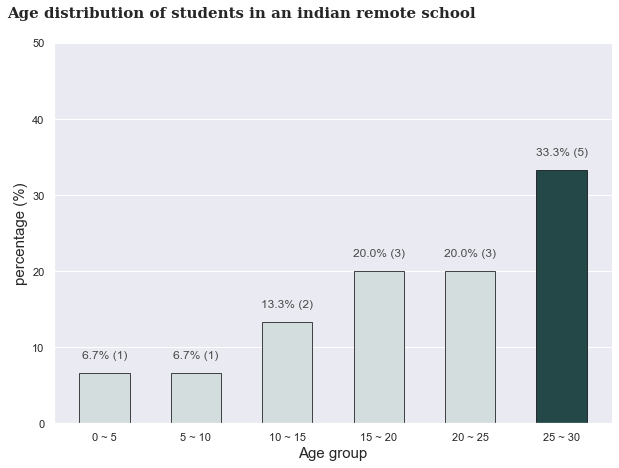

In [24]:
# Q. What is the age distribution of the students in an Indian remote school?
age_list = [3, 11, 12, 19, 22, 23, 24, 25, 27, 29, 15, 6, 27, 17, 29]
age_list = sorted(age_list)
age_data = pd.DataFrame(age_list,columns=['Age'])

color_map = ['#d4dddd' for _ in range(9)]
color_map[5] = '#244747' # color highlight

def age_band(num):
    for i in range(1, 100):
        if num < 5*i :  return f'{(i-1) * 5} ~ {i*5}'
age_data['age_band'] = age_data['Age'].apply(age_band)
age_distribution = age_data.groupby(['age_band']).size().sort_values(ascending=True) / age_data.groupby(['age_band']).size().sum() * 100
age_count = age_data.groupby(['age_band']).size()

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.bar(age_distribution.index, age_distribution, 
       color=color_map, 
       width=0.55,
       edgecolor='black', 
       linewidth=0.7)
ax.set(xlabel="Age group",
       ylabel="percentage (%)")
fig.text(0.06, 0.93, "Age distribution of students in an indian remote school", fontsize=15, fontweight='bold', fontfamily='serif')

#highlight highest value bar 
for s in ["top","right"]:
    ax.spines[s].set_visible(False)

#add annotation
for i in age_distribution.index:
    ax.annotate(f"{age_distribution[i]:.01f}% ({age_count[i]})", 
                   xy=(i, age_distribution[i] + 2.3),
                   va = 'center', ha='center',fontweight='light', 
                   color='#4a4a4a')
    
#increase axis font size 
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)

#grid range + add grid line
grid_y_ticks = np.arange(0, 51, 10)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='x', linestyle='-', alpha=0.4)

* (2) 150 students of class were asked to state their favorite subjects  and these were the results of survey.
      French: 30,	English: 20, Maths:26, 	Geography: 38, 	Science:34


Horizontal bar plot is appropriate for this data because
- it effectively show the comparisons among subject categories.
- sorting allows readers to find the subject with the highest votes easily.

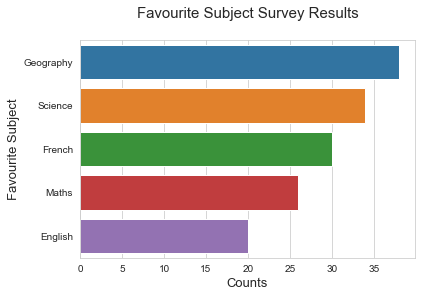

In [3]:
survey = {'French': 30,    'English': 20, 'Maths':26,     'Geography': 38,     'Science':34}
survey_data = pd.DataFrame(survey.items(), columns=["Subject", "Count"]) 
#sort most popular subj to least 
survey_data = survey_data.sort_values(by = 'Count', ascending = False)
survey_data.reset_index(drop=True)

# columnsTitles = ["Favourite Subject", "Count"]
sns.set_style("whitegrid")
fig  = sns.barplot(x = "Count", y = "Subject", data= survey_data)

plt.xlabel("Counts", fontsize = 13)
plt.ylabel("Favourite Subject", fontsize = 13)
plt.title("Favourite Subject Survey Results\n ", fontsize = 15) 
plt.show(fig)

* (3) A company collected statistics about children to show that children liked TV more than other activities. These were the results of the survey
        School: 6, Sleep: 8, Playing: 2, Study: 4, T. V.: 1, Others: 3


pie chart is appropriate for this data because 
- it can effectively display relative proportions of activities.
- it is visually simpler than other graphs.

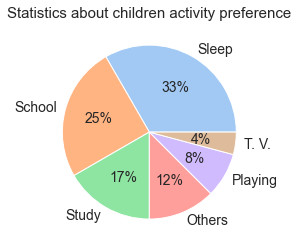

In [4]:
#Assume that the results represent the avg time spent by children during a day.
stat = {'School': 6, 'Sleep': 8, 'Playing': 2, 'Study': 4, 'T. V.': 1, 'Others': 3}
stat_data = pd.DataFrame(stat.items(), columns=["Activity", "Count"]) 
stat_data

# #sort most popular subj to least 
stat_data = stat_data.sort_values(by = 'Count', ascending = False)
stat_data.reset_index(drop=True)

#create pie chart
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:6]
plt.pie(stat_data['Count'], labels = stat_data['Activity'], colors=colors, autopct='%.0f%%',textprops = {'fontsize':14},)
plt.title("Statistics about children activity preference", fontsize = 15) 
plt.show()

* (4) A clinal trial measurement of two different groups A and B were reported. Which group is performing better (high values are better)?
      A={0.22, -0.87, -2.39, -1.79, 0.37, -1.54, 1.28, -0.31, -0.74, 1.72, 0.38, -0.17, -1.62, -1.10, 0.30, 0.15, 2.30, 0.19, -0.50, -0.09}
      B={-5.13, -2.15, -3.43, -3.83, 0.50, -3.25, 4.32, 0.63, 5.18, -0.43, 7.11, 4.87, -3.10, -5.81, 3.76, 6.31, 2.58, 0.07, 5.76, 3.50}

Box plot is appropriate for this data because
- to find out which group is performing better, five-number summary (minimum, quartiles, median) was observed.
- chart shows that the median of Group B's performance is relatively higher than group A. 
- more people in Group B perform better than Group A.

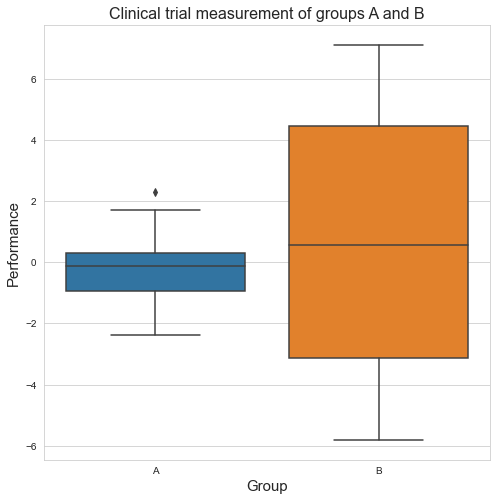

In [5]:
A={0.22, -0.87, -2.39, -1.79, 0.37, -1.54, 1.28, -0.31, -0.74, 1.72, 0.38, -0.17, -1.62, -1.10, 0.30, 0.15, 2.30, 0.19, -0.50, -0.09}
B={-5.13, -2.15, -3.43, -3.83, 0.50, -3.25, 4.32, 0.63, 5.18, -0.43, 7.11, 4.87, -3.10, -5.81, 3.76, 6.31, 2.58, 0.07, 5.76, 3.50}

clinical_data = pd.DataFrame(list(zip(A, B)), columns=['A', 'B'])

plt.figure(figsize=(8,8))
sns.boxplot(data=clinical_data)
plt.title("Clinical trial measurement of groups A and B", fontsize = 16) 
plt.xlabel("Group", fontsize = 15)
plt.ylabel("Performance", fontsize = 15)
plt.show()


## Part 2 (10 points)
### Look at the visualization in this link http://www.weeklystandard.com/over-100-million-now-receiving-federal-welfare/article/649589
### Critique the design by answering the following questions (3 pts)



1) What is the objective of that visualization?

The objective of the visuallization is to show the number of Americans receiving U.S. federal welfare benefit over the period of 2009-2011.

(2) What elements of the design are related to that objective? 

- Bar plot is used to show an increase in the number of welfare benefit recipients in U.S.
- Big headline grabs attention to a large number '100M' 
- truncated y-axis makes the chart looks like there is a dramatic increase in the number of welfare recipients.
- Subtext used to add information about the dataset.

(3) Are those elements effective in achieving the objective

Those elements are not properly used to show what is really happening to the number of Americans receiving U.S. federal welfare benefit.
- The baseline (origin of y-axis) of bar plot starts from 94M instead of 0. If baseline starts at 0, the change in the number of welfare benefit recipients is much less dramatic.
- Subtext contain unneccesary content which can be explained in the article content.  


### Based on your own critique, fix the visualisation (**replot** with your revisions) (7 pts)

The way the information is presented in the visualization is misleading. 
I would fix the visualization by: 
- setting the baseline at 0 on the y-axis. The chart will then have bars with relatively similar heights and we would be able to see that there has been a slow and gradual increase in the number of welfare benefit recipients easily just by looking at the visualization. 
- adding horizontal dotted line to y-axis will allow the readers to get the y-axis value of each bar easier. 
- removing original subtext below the headline or relocating the subtext in the bottom of the visualization. This will make the chart look more clear. 
- changing the y-axis unit in milions.
- adding x-axis label. 

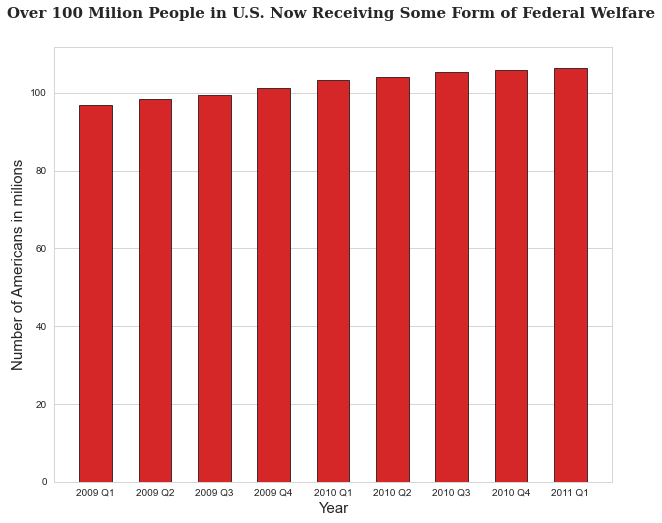

In [6]:
assistance = [96918367, 98510204, 99306122, 101163265, 103285714, 104081633, 105408163, 105938776, 106469388]
quarter = ['2009 Q1', '2009 Q2', '2009 Q3', '2009 Q4', '2010 Q1', '2010 Q2', '2010 Q3', '2010 Q4', '2011 Q1']

df = pd.DataFrame(zip(assistance, quarter), columns = ['assistance', 'year']).set_index('year')
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.bar(df.index, df['assistance']/1000000, 
       color='tab:red', 
       width=0.55,
       edgecolor='black', 
       linewidth=0.7)
ax.set(xlabel="Year",
       ylabel="Number of Americans in milions")
fig.text(0.06, 0.93, "Over 100 Milion People in U.S. Now Receiving Some Form of Federal Welfare", fontsize=15, fontweight='bold', fontfamily='serif')

#increase axis font size 
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
grid_y_ticks = np.arange(0, 101, 20)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='x', linestyle='-', alpha=0.2)

## Part 3 (80 points)
Use the dataset given in the course shell (Homework1dataset.zip) and conduct a Visual EDA (Exploratory Data Analysis) study by following these steps; \

(Data source: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

(1) Visualize the target (label) of the dataset, and briefly explain your findings (Hint 1: Malignant or Benign) (Hint 2: Number of each class and/or the ratio)

From the pie chart, we can see that 63% of patients were diagnosed as 'Benign' and 37% of patients were diagnosed as 'Malignant'. 

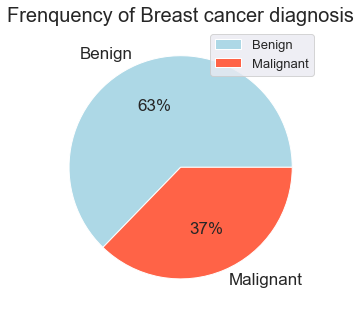

In [17]:
file = pd.read_csv("data.csv")
df = pd.DataFrame(file)
target_num = df.groupby(['diagnosis']).size() 
target_per = df.groupby(['diagnosis']).size() / df.groupby(['diagnosis']).size().sum() * 100

#create pie chart
#define Seaborn color palette to use
fig = plt.gcf()
fig.set_size_inches(5,10) 
labels = ["Benign", "Malignant"]
colors = ['lightblue', 'tomato'] #sns.color_palette('pastel')[0:2]
plt.pie(target_num, labels=labels ,colors=colors, autopct='%.0f%%',textprops = {'fontsize':17},)
plt.title("Frenquency of Breast cancer diagnosis", fontsize = 20) 
plt.legend(labels=labels, fontsize=13, loc="upper right")
plt.show()


(2) Plot histograms of features that has `"_means"` on attribute name (eg. `radius_mean`, `texture_mean`,`area_mean`, etc)

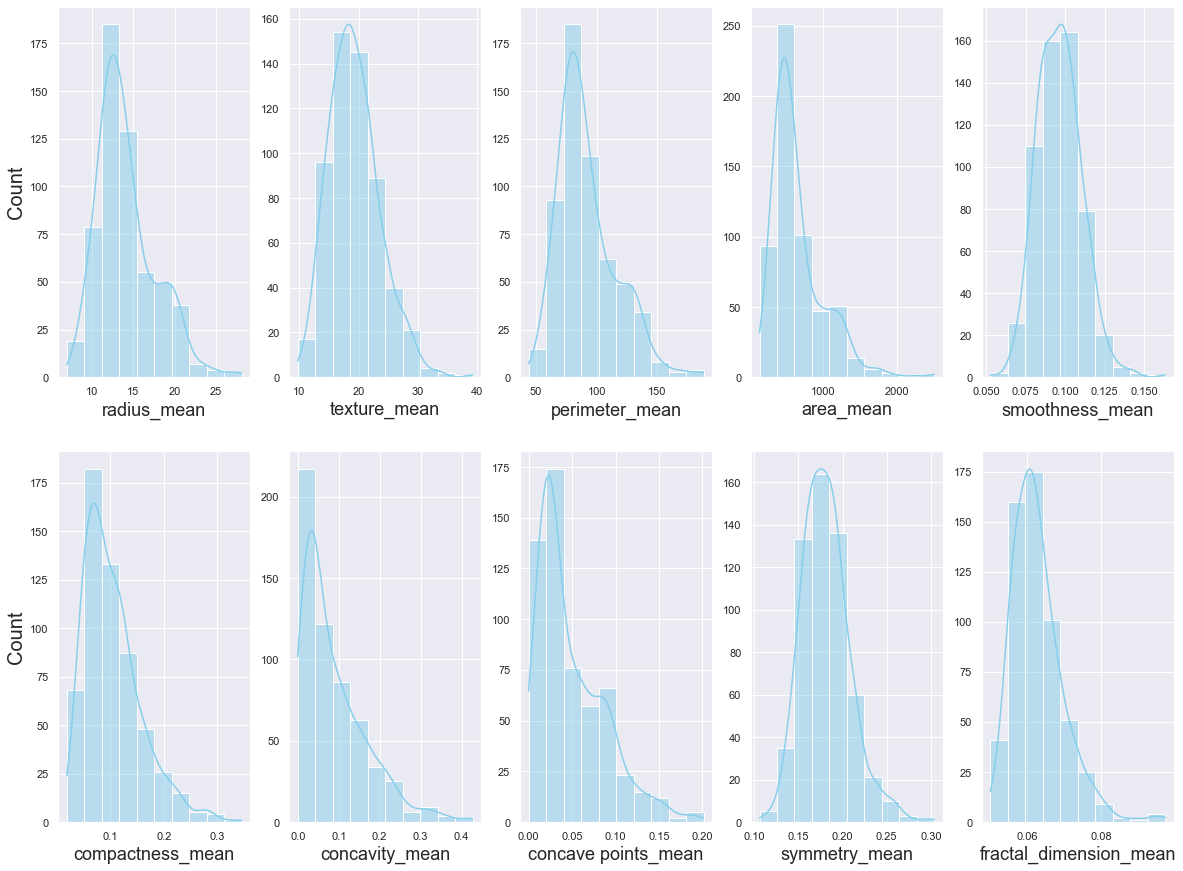

In [18]:
means_cols = [col for col in df.columns if '_mean' in col]
mean_df = df[means_cols]
mean_df

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 5, figsize=(20, 15))
for i in range(5): 
    p = sns.histplot(data=df, x=means_cols[i],  bins = 10, kde=True, color="skyblue", ax=axs[0, i])
    if i != 0: 
        p.set_ylabel("", fontsize=15)
    elif i == 0: 
        p.set_ylabel("Count", fontsize=20)
    p.set_xlabel(means_cols[i], fontsize=18)
    p = sns.histplot(data=df, x=means_cols[i+5], bins = 10, kde=True, color="skyblue", ax=axs[1, i])
    if i != 0: 
        p.set_ylabel("", fontsize=15)
    elif i == 0: 
        p.set_ylabel("Count", fontsize=20)
    p.set_xlabel(means_cols[i+5], fontsize=18)

(3) Plot histograms of features that has `"_means"` on attribute name (eg. `radius_mean`, `texture_mean`,`area_mean`, etc) for each class (Malignant or Benign) on the same histogram plot and briefly explain your findings.

- From the histograms, we can see that both benign and malignant have unimodal distribution. 
- Malignant cases are less right skewed and have wider distribution compared to Benign cases in most of "_means" attributes

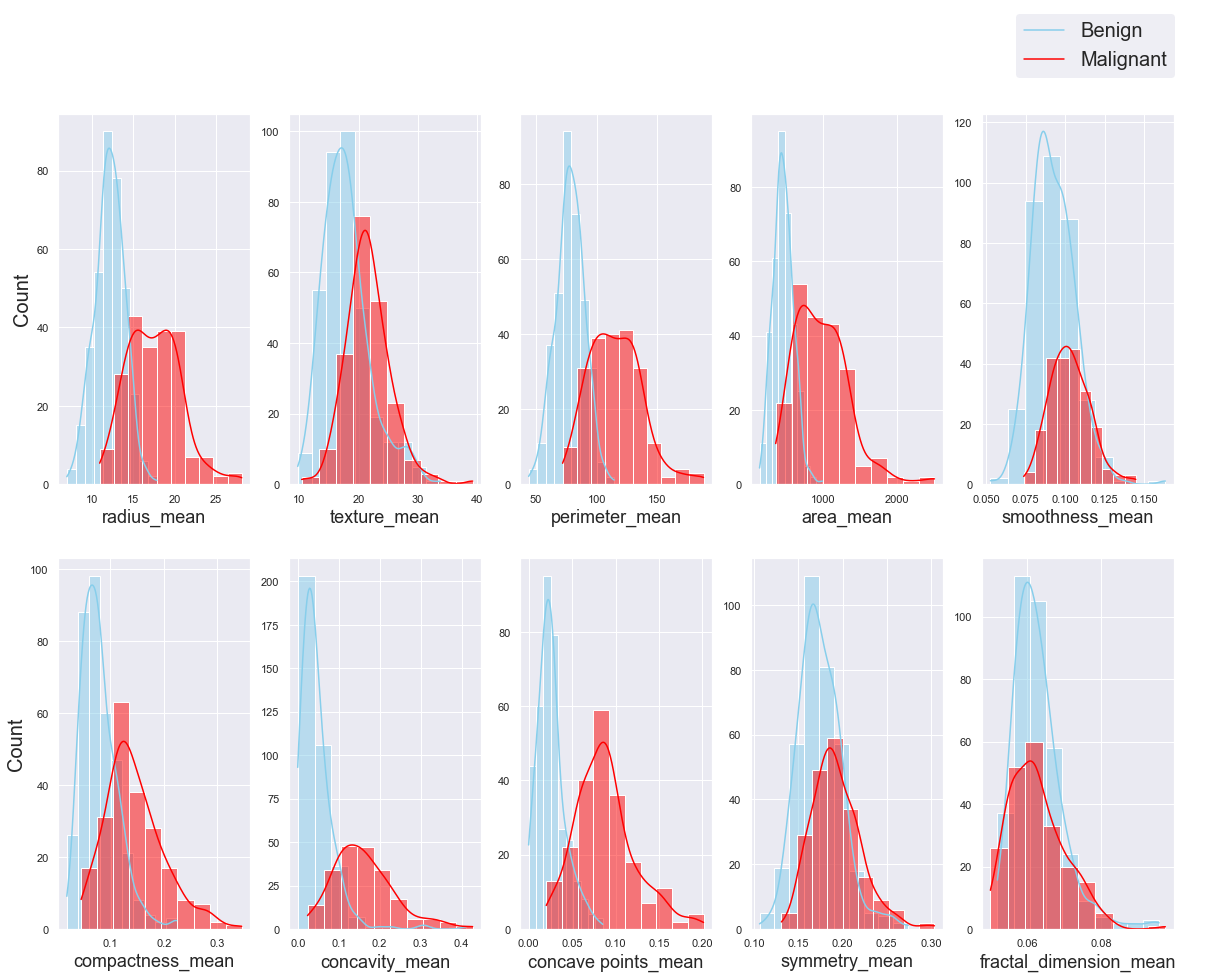

In [19]:
means_cols2 = means_cols + ['diagnosis']
b_df = df[means_cols2][df['diagnosis'] == "B"]
m_df = df[means_cols2][df['diagnosis'] == "M"]

fig, axs = plt.subplots(2, 5, figsize=(20, 15))
for i in range(5): 
    sns.histplot(data=b_df, x=means_cols[i],  label='Benign', bins = 10, kde=True, color="skyblue", ax=axs[0, i])
    p = sns.histplot(data=m_df, x=means_cols[i],  label='Malignant', bins = 10, kde=True, color="red", ax=axs[0, i])
    if i != 0: 
        p.set_ylabel("", fontsize=15)
    elif i == 0: 
        p.set_ylabel("Count", fontsize=20)
    p.set_xlabel(means_cols[i], fontsize=18)    
    sns.histplot(data=b_df, x=means_cols[i+5], label='Benign', bins = 10, kde=True, color="skyblue", ax=axs[1, i])
    p = sns.histplot(data=m_df, x=means_cols[i+5], label='Malignant', bins = 10, kde=True, color="red", ax=axs[1, i])
    if i != 0: 
        p.set_ylabel("", fontsize=15)
    elif i == 0: 
        p.set_ylabel("Count", fontsize=20)
    p.set_xlabel(means_cols[i+5], fontsize=18) 

fig.legend(labels=['Benign','Malignant'], loc=(0.825, 0.92), edgecolor='None', fontsize=20)
plt.show()
    

(4) Conduct an outlier analysis using your choice of visualization for any 4 features. (Hint: You can use Box-Whiskers, Scatter plot)

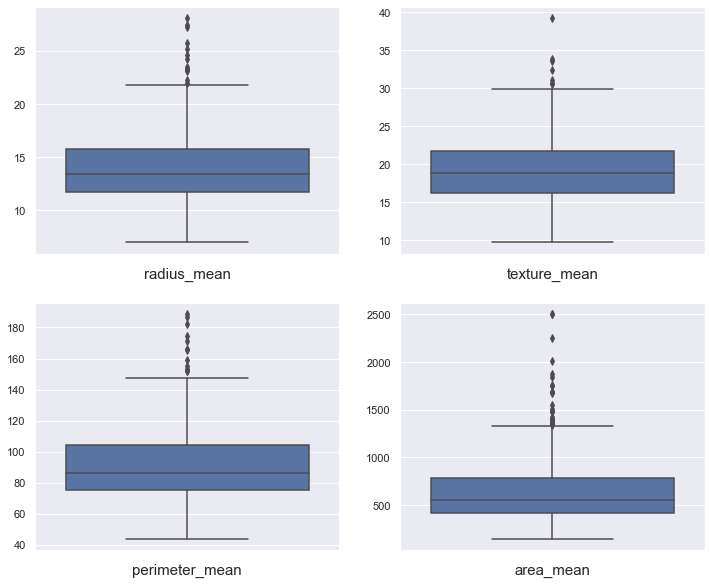

In [10]:
features = ['radius_mean','texture_mean','perimeter_mean','area_mean', 'diagnosis']
whisker_df = df[features]
whisker_df

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
for i in range(2): 
    p = sns.boxplot(y=whisker_df[features[i]], ax=axs[0, i])
    p.set_ylabel("")
    p.set_xlabel(features[i], fontsize=15)
    p = sns.boxplot(y=whisker_df[features[i+2]], ax=axs[1, i])  
    p.set_xlabel(features[i+2], fontsize=15)
    p.set_ylabel("")

(5) Conduct an outlier analysis using your choice of visualization for any 4 features. (Hint: You can use Box-Whiskers, Scatter plot) for each class for comparison (preferably side by side), and briefly explain your findings.

- Malignant cases tend to have higher "_mean" values than Benign cases. 
- Malignant tend to have longer box plots indicating more dispersed the data.
- when we compare these box plots with the previous histograms, box-Whiskers provide more detailed information such as difference between the median of malignant radius and Benign radius, while histogram are better in determining the distribution of the data at a glance.

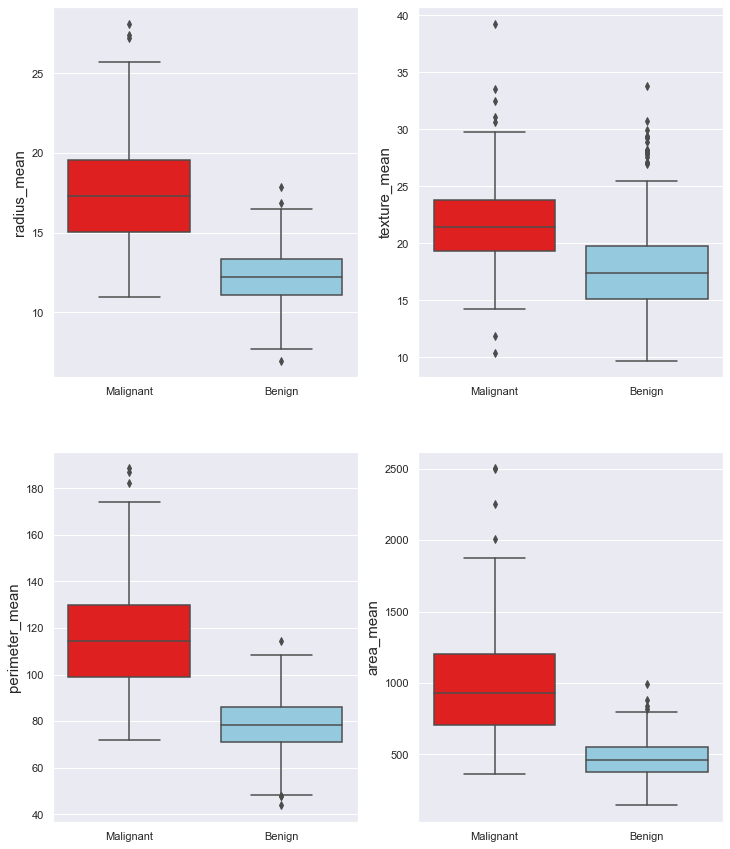

In [15]:
whisker_df.loc[whisker_df.diagnosis == 'B', 'diagnosis'] = "Benign"
whisker_df.loc[whisker_df.diagnosis == 'M', 'diagnosis'] = "Malignant"

fig, axs = plt.subplots(2, 2, figsize=(12, 15))
my_pal = {"Benign": "skyblue", "Malignant": "red"}
for i in range(2): 
    p = sns.boxplot(x=whisker_df['diagnosis'], y=whisker_df[features[i]], palette=my_pal, ax=axs[0, i])
    p.set_xlabel("")
    p.set_ylabel(features[i], fontsize=15)
    p = sns.boxplot(x=whisker_df['diagnosis'], y=whisker_df[features[i+2]], palette=my_pal, ax=axs[1, i])  
    p.set_xlabel("")
    p.set_ylabel(features[i+2], fontsize=15)

(6) **Bonus :** Analyze dataset, pick any question of yours to answer with an impressive visualization!

#Q pair plot and heatmap plot of the breast cancer data 

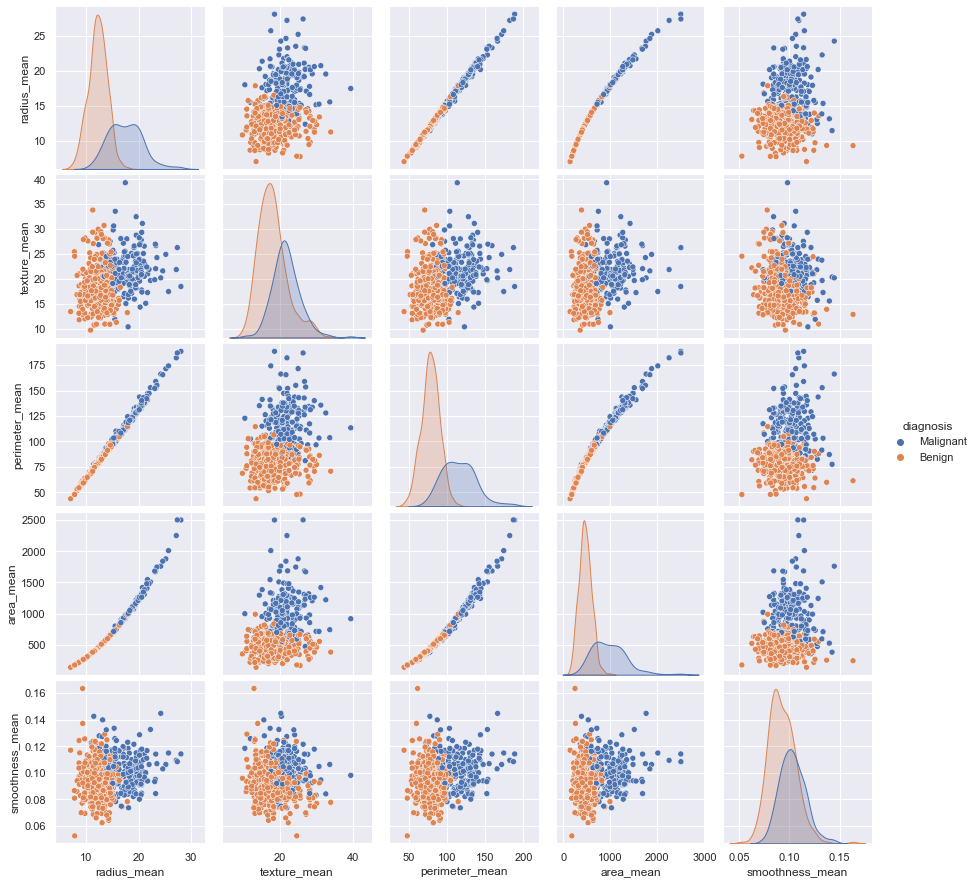

In [12]:
file = pd.read_csv("data.csv")
df = pd.DataFrame(file)
df.drop(['id'], axis=1)
df.loc[df.diagnosis == 'M', 'diagnosis'] = "Malignant"
df.loc[df.diagnosis == 'B', 'diagnosis'] = "Benign"
sns.pairplot(df, hue='diagnosis', vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'])

<AxesSubplot:>

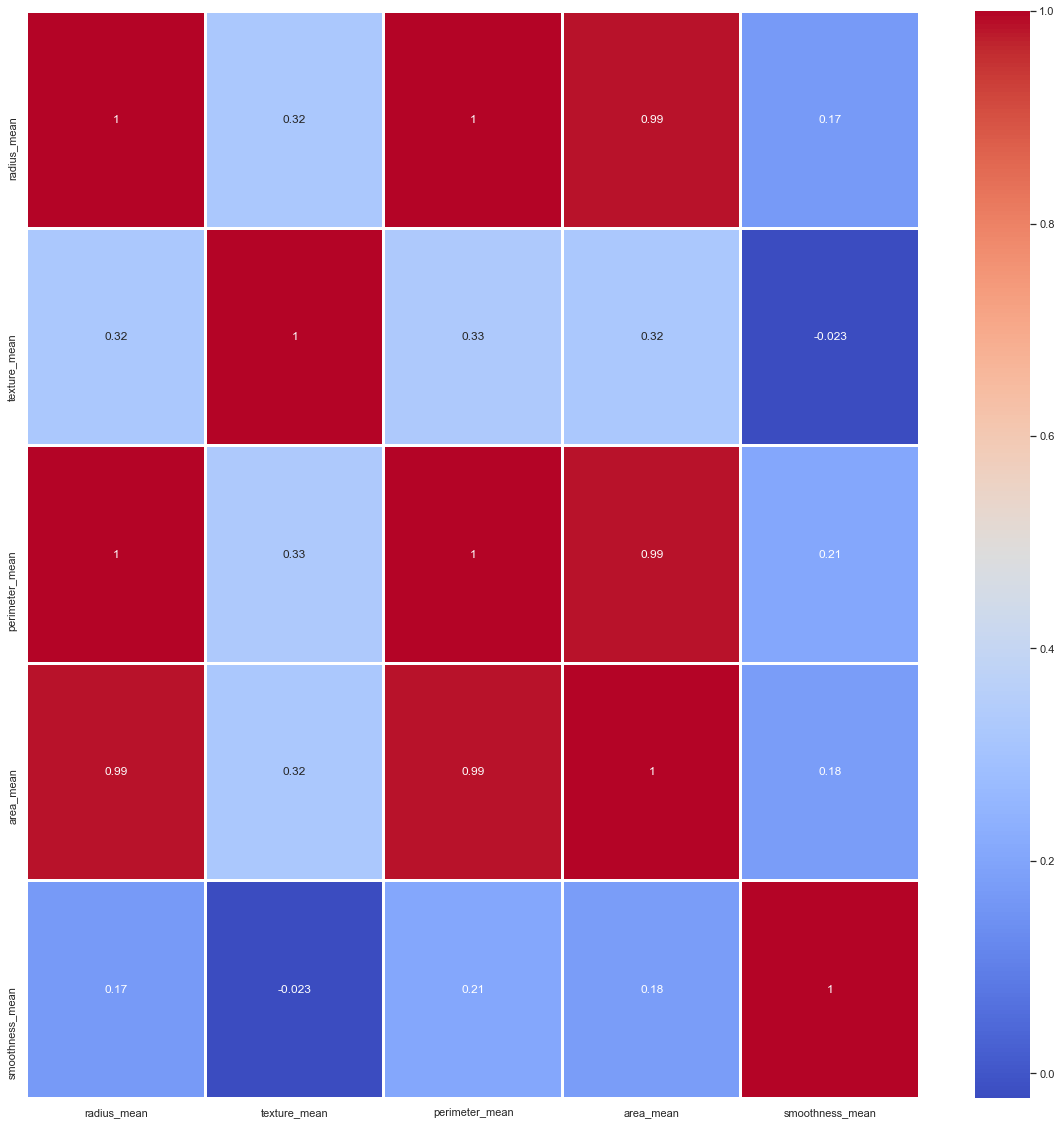

In [13]:
plt.figure(figsize=(20,20))
attributes = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
sns.heatmap(df[attributes].corr(), annot = True, cmap ='coolwarm', linewidths=2)